In [14]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Now, let's retrieve the S&P 500 data of the past 5 years using yfinance
sp500 = yf.Ticker("^GSPC").history(period="5y")
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-20 00:00:00-04:00,2841.939941,2853.860107,2831.290039,2840.229980,3293750000,0.0,0.0
2019-05-21 00:00:00-04:00,2854.020020,2868.879883,2854.020020,2864.360107,3223050000,0.0,0.0
2019-05-22 00:00:00-04:00,2856.060059,2865.469971,2851.110107,2856.270020,3194000000,0.0,0.0
2019-05-23 00:00:00-04:00,2836.699951,2836.699951,2805.489990,2822.239990,3899320000,0.0,0.0
2019-05-24 00:00:00-04:00,2832.409912,2841.360107,2820.189941,2826.060059,2889230000,0.0,0.0


In [16]:
# Drop the 'Dividends' and 'Stock Splits' columns
sp500 = sp500.drop(columns=["Dividends", "Stock Splits"])
# Let's take a look at the data
sp500.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000
2024-05-17 00:00:00-04:00,5303.100098,5305.450195,5283.589844,5303.270020,3578120000


In [17]:
# Summary statistics
sp500.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,3926.942426,3950.268264,3902.218545,3927.725720,4.333342e+09
std,654.498451,654.777535,654.968891,655.023254,1.055967e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,1.296530e+09
25%,3348.890015,3366.119995,3328.770020,3348.789917,3.712900e+09
50%,4015.540039,4048.290039,3983.989990,4016.949951,4.081270e+09
75%,4411.584961,4439.645020,4390.599854,4411.569824,4.695315e+09
max,5310.069824,5325.490234,5296.189941,5308.149902,9.976520e+09


In [18]:
# General info
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-05-20 00:00:00-04:00 to 2024-05-17 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [19]:
# We can use pandas to calculate the moving average for different time periods
sp500["50ma"] = sp500["Close"].rolling(window=50).mean()
sp500["200ma"] = sp500["Close"].rolling(window=200).mean()

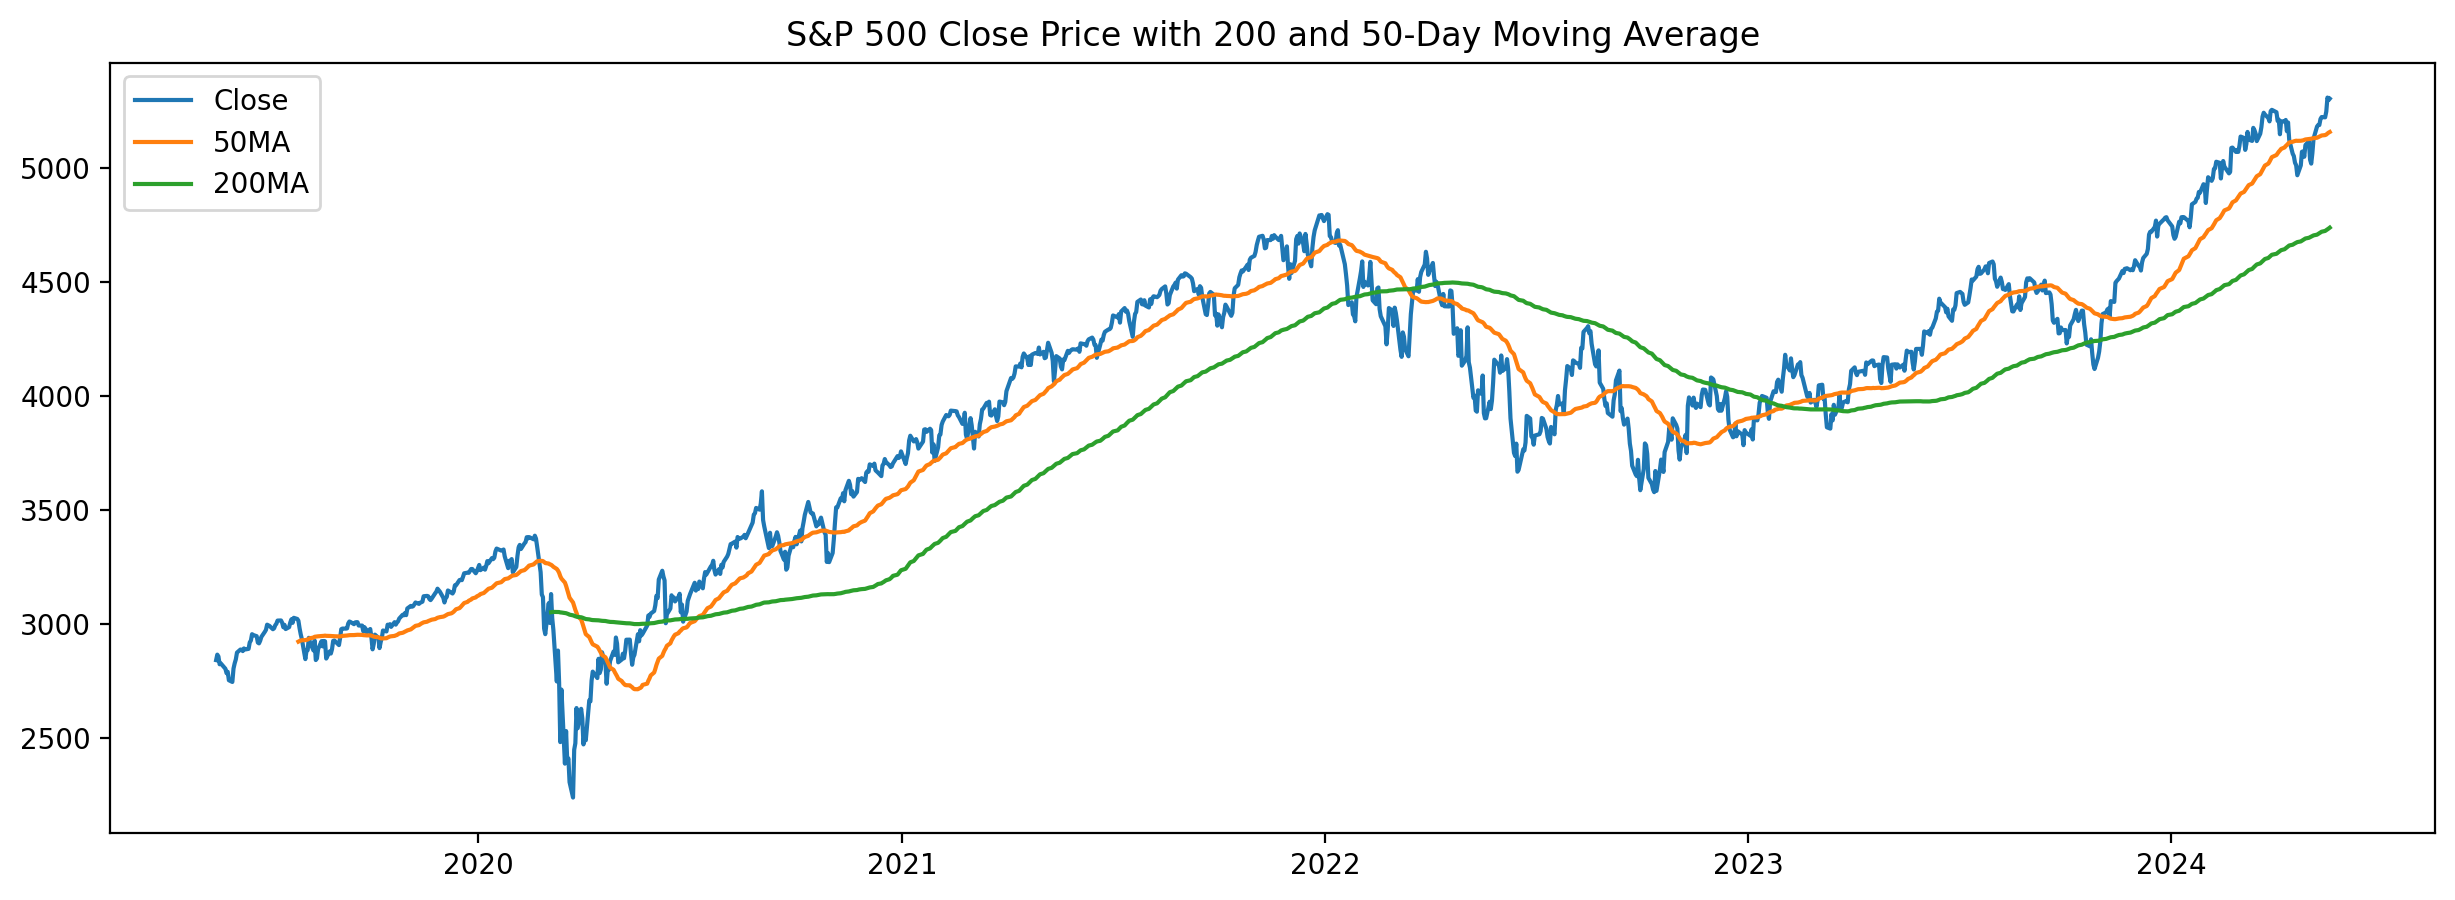

In [20]:
# Let's plot the data to see the moving averages
plt.figure(figsize=(15, 5))
plt.title("S&P 500 Close Price with 200 and 50-Day Moving Average")
plt.plot(sp500["Close"])
plt.plot(sp500["50ma"])
plt.plot(sp500["200ma"])
plt.legend(["Close", "50MA", "200MA"])
plt.show()

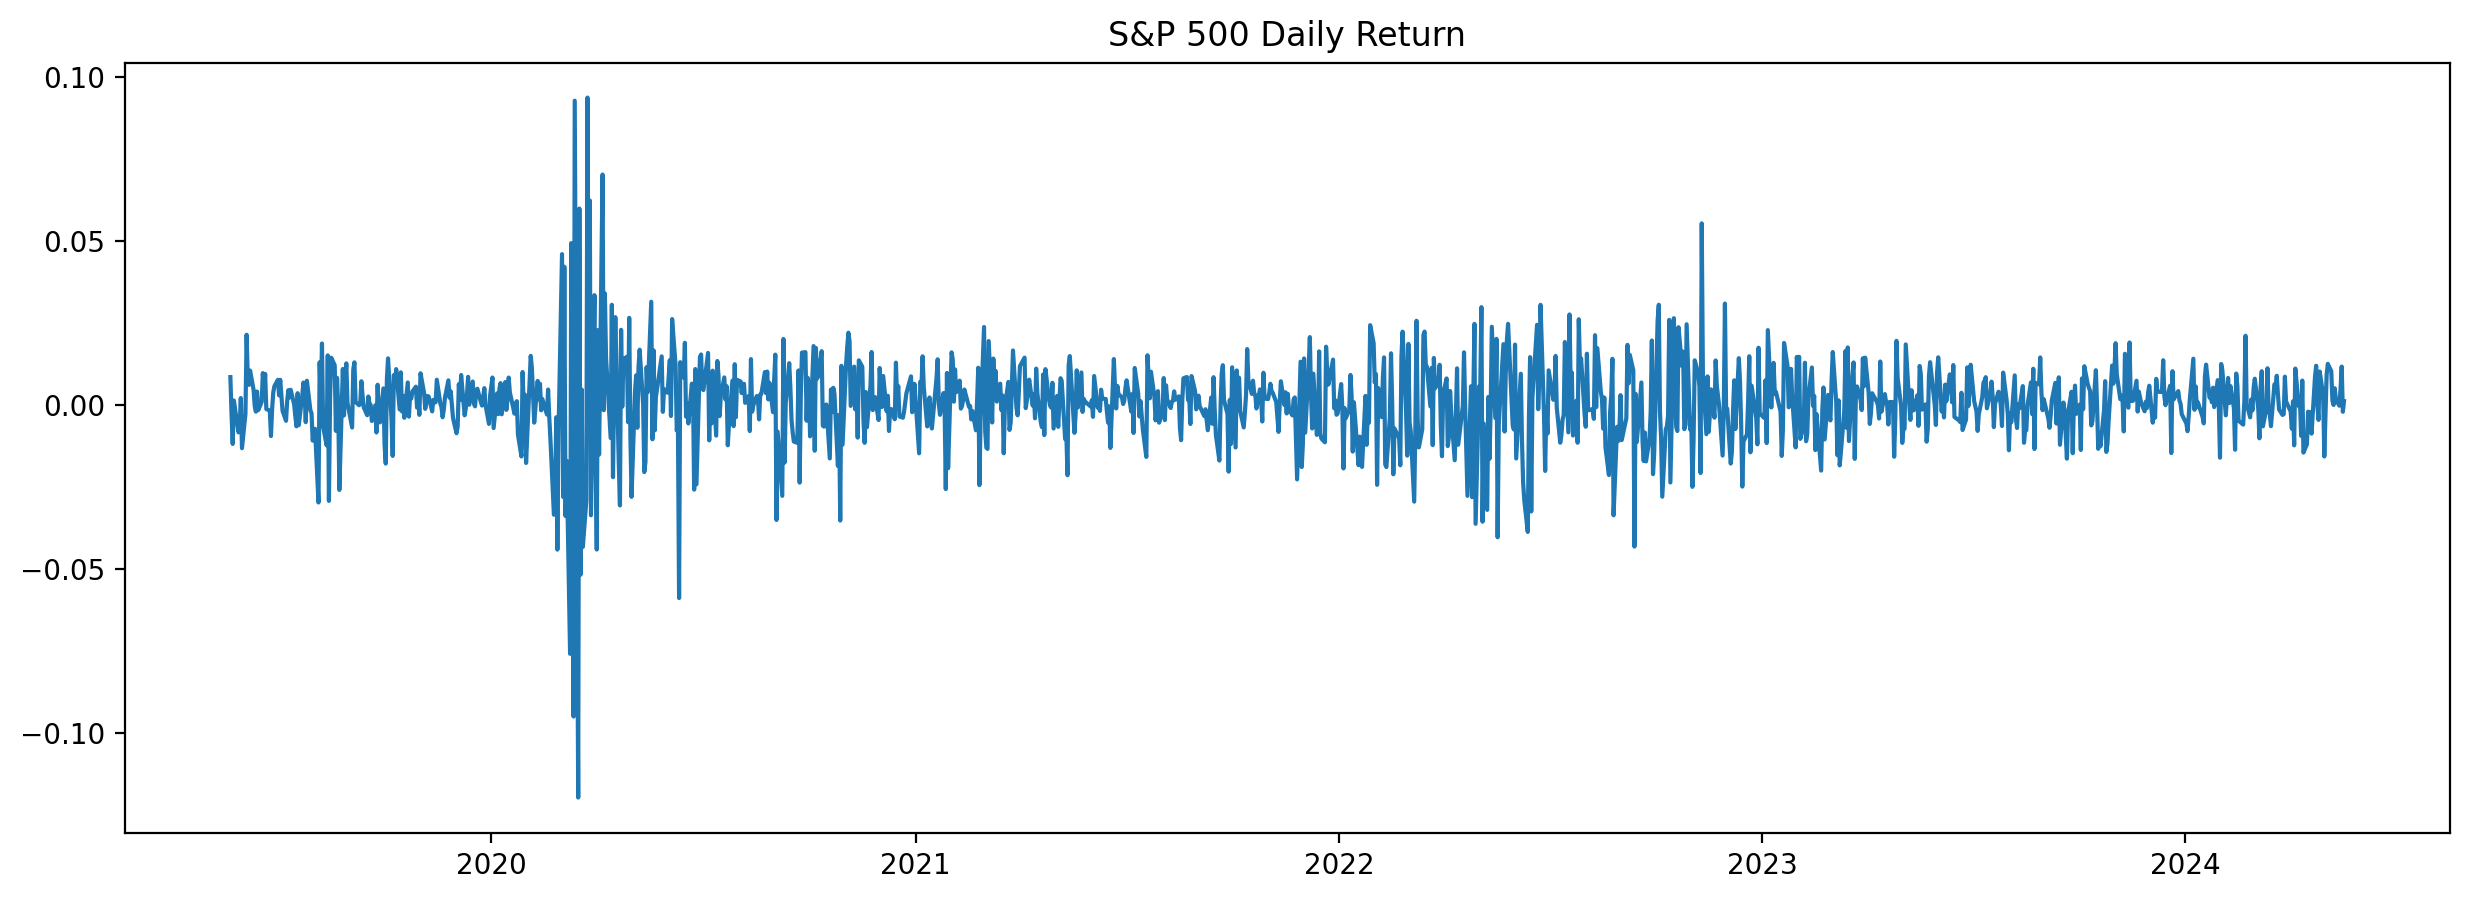

In [21]:
# Calculate the daily return of the close price
sp500["return"] = sp500["Close"].pct_change()

# Plot the daily return
plt.figure(figsize=(15, 5))
plt.title("S&P 500 Daily Return")
plt.plot(sp500["return"])
plt.show()

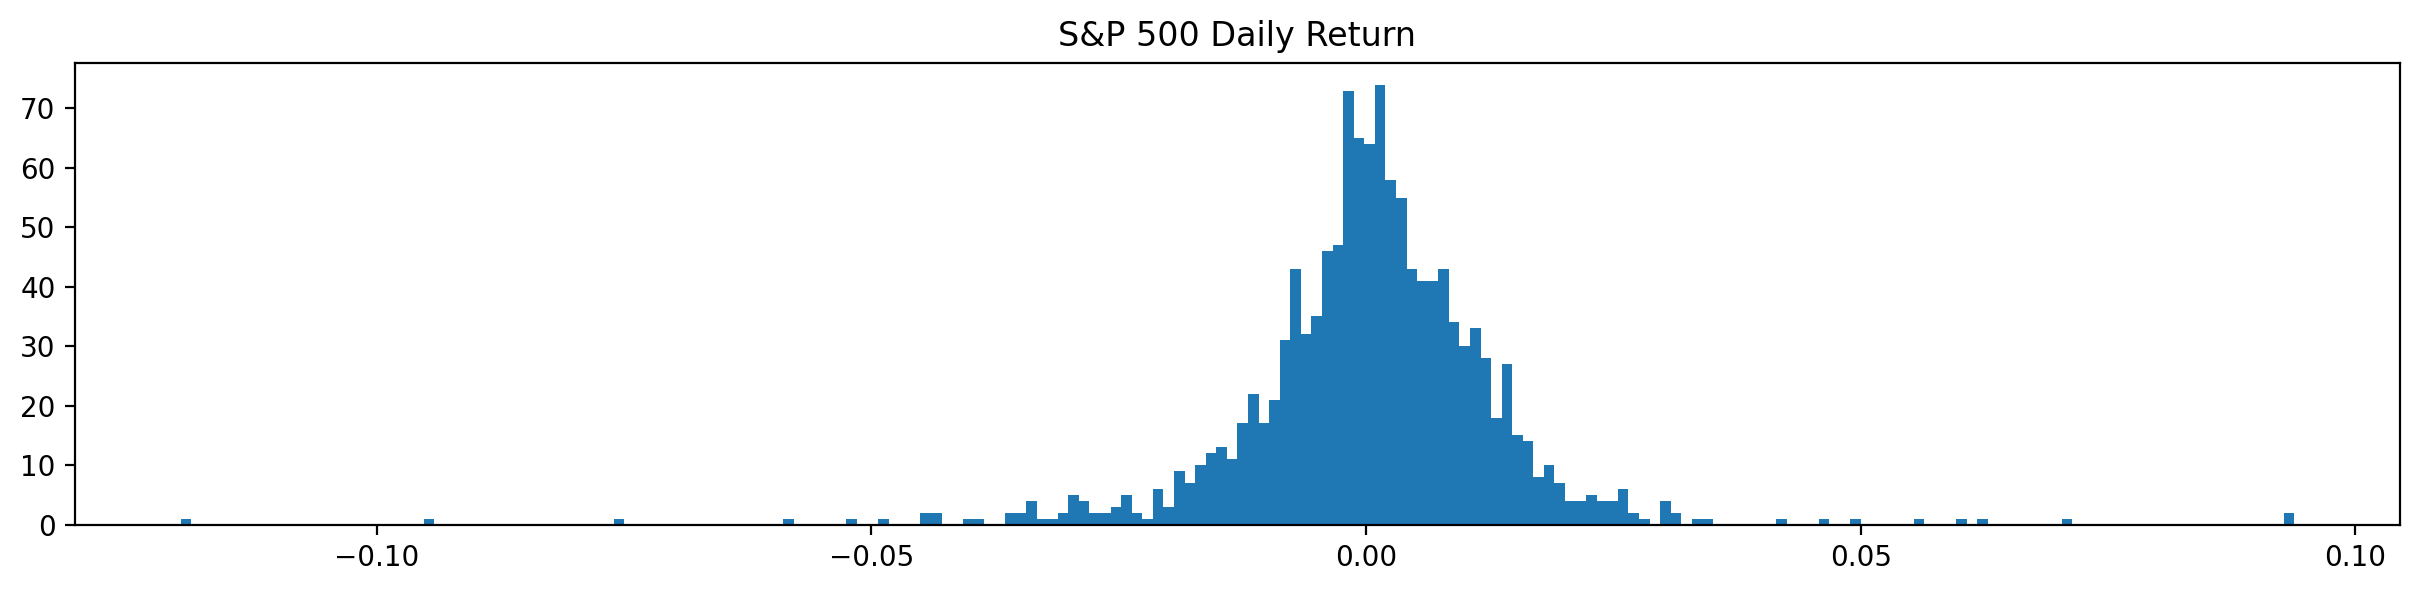

In [22]:
# Plot the daily return using an histogram
plt.figure(figsize=(15, 3))
plt.title("S&P 500 Daily Return")
sp500["return"].hist(bins=200, grid=False)
plt.show()

### Rolling correlation between the return and volatility - some info:
The rolling correlation between the return and volatility can be used to assess the relationship between the risk and return of a security, as well as to identify potential changes in market conditions. For example, a positive correlation between return and volatility may indicate that the security tends to experience larger returns when the market is more volatile, while a negative correlation may indicate the opposite.

The rolling correlation between the return and volatility is calculated by taking the correlation between the return and volatility over a rolling window of a certain number of trading days, and updating the correlation as the window moves forward in time.

The code below calculates the rolling correlation between the return and volatility using a window of 252 trading days (approximately 1 year) and 50 trading days:

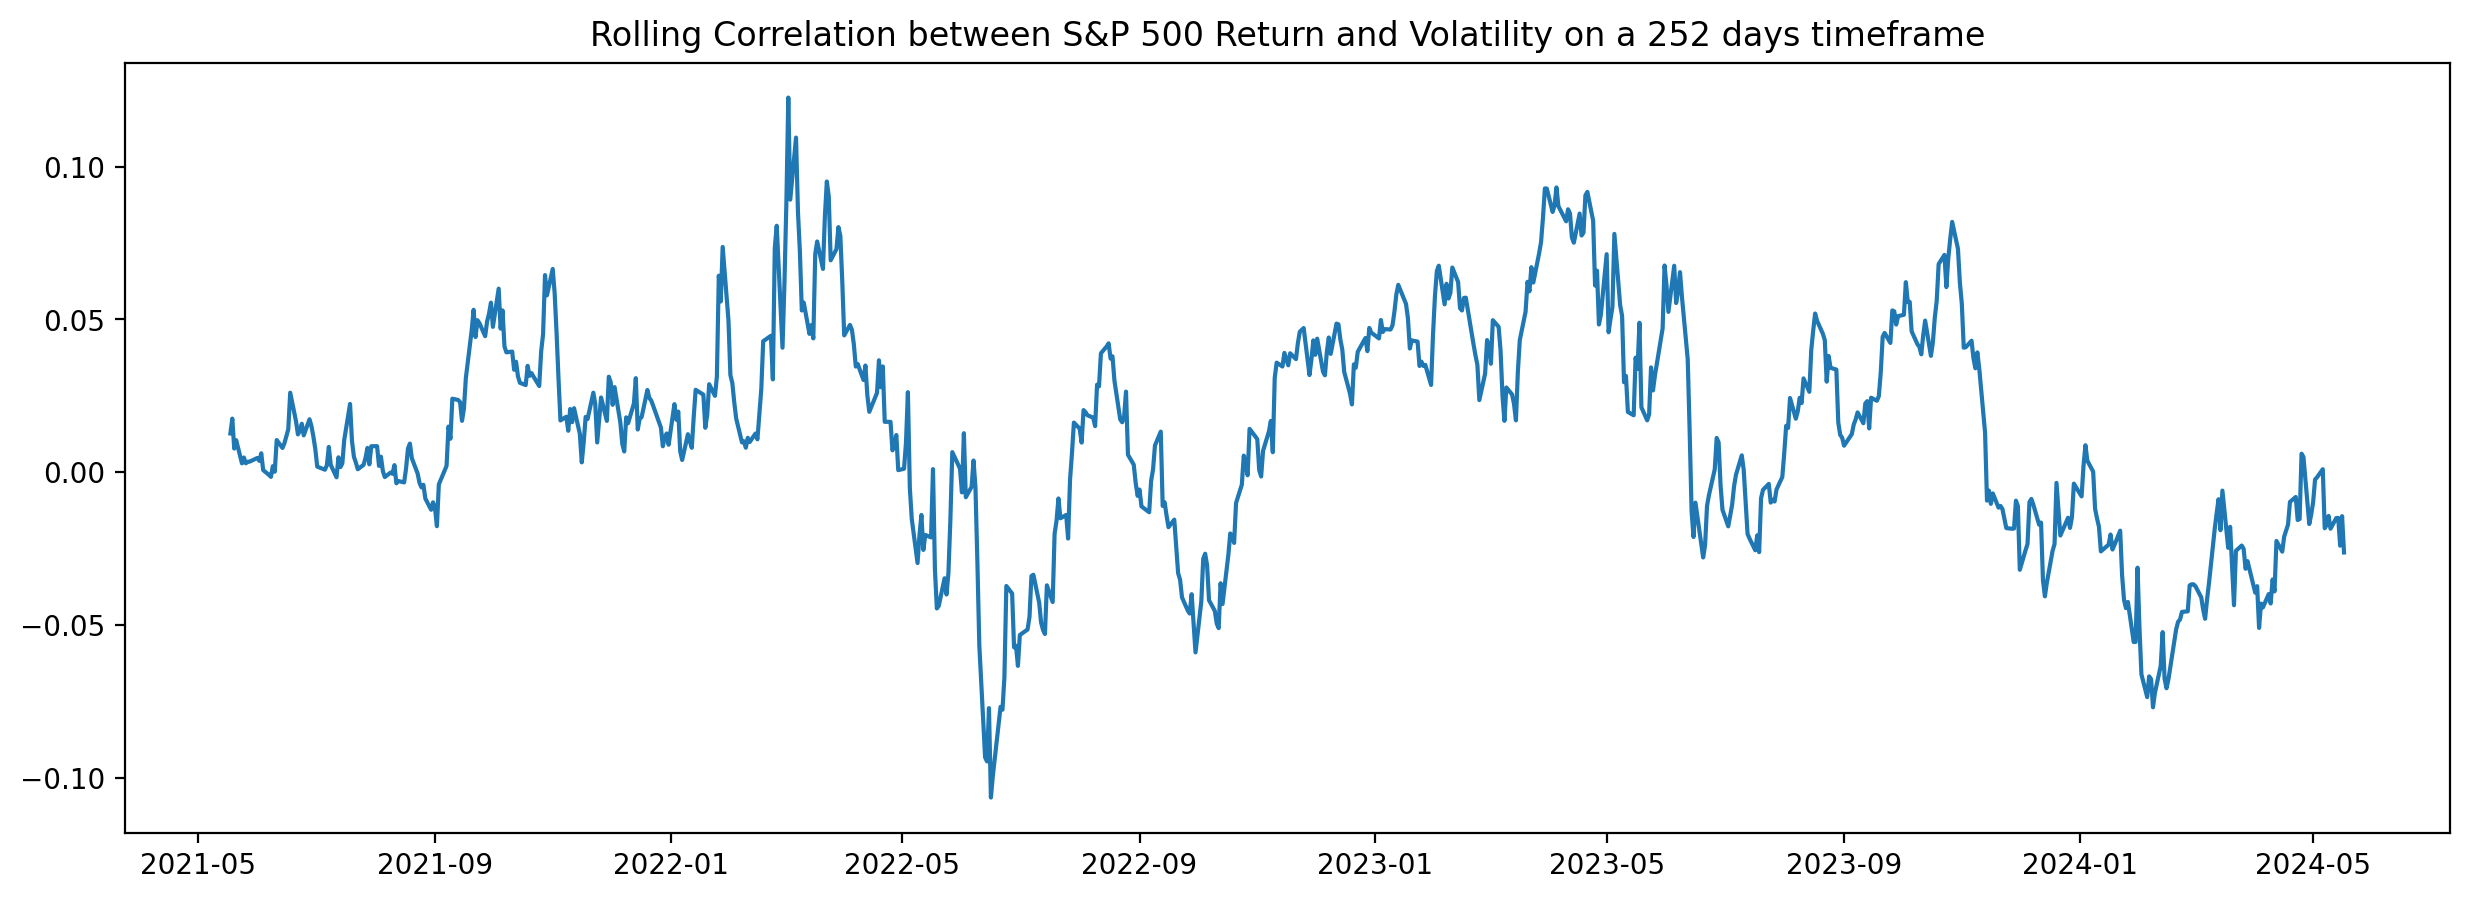

In [23]:
# Calculate the volatility of the close price
sp500["volatility"] = sp500["return"].rolling(window=252).std() * (252**0.5)

# Calculate the rolling correlation between the return and volatility
sp500["corr252"] = sp500["return"].rolling(window=252).corr(sp500["volatility"])

# Plot the rolling correlation
plt.figure(figsize=(15, 5))
plt.title("Rolling Correlation between S&P 500 Return and Volatility on a 252 days timeframe")
plt.plot(sp500["corr252"])
plt.show()

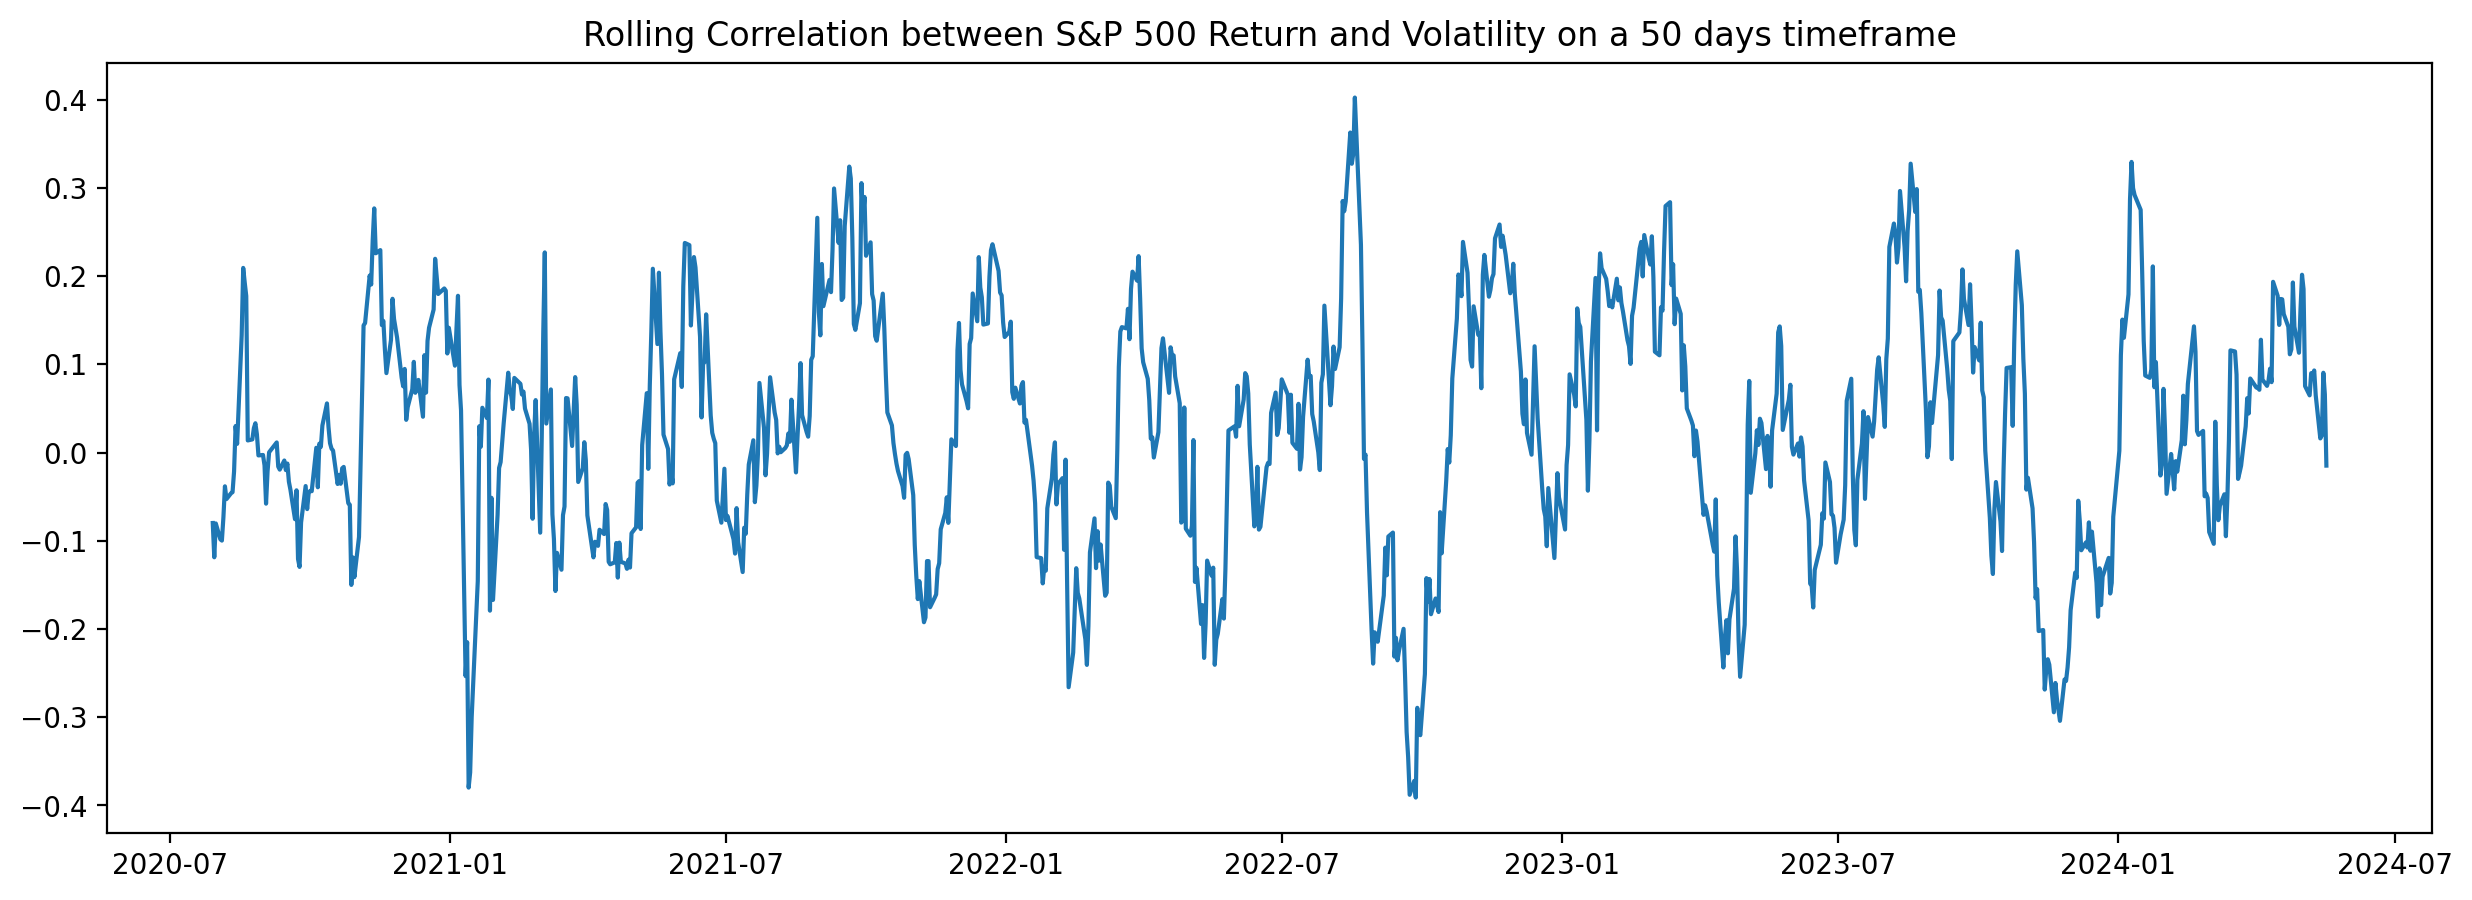

In [24]:
# Calculate the rolling correlation between the return and volatility using a window size of 50 trading days
sp500["corr50"] = sp500["return"].rolling(window=50).corr(sp500["volatility"])

# Plot the rolling correlation
plt.figure(figsize=(15, 5))
plt.title("Rolling Correlation between S&P 500 Return and Volatility on a 50 days timeframe")
plt.plot(sp500["corr50"])
plt.show()